# <span style="color:gray">Chuck's project for Advanced Health</span>
- Uses CMS Medicare data obtained in both CSV and TXT format.
- The data are uploaded into an SQLite database using SQL.
- Analysis is done using SQL and Python.
<br> 1. Transportation claims that overlap with inpatient stays.
<br> 2. Top billers of prosthetics and orthotics (L HCPCS).
<br> 3. Forecasting using regression. 

## <span style="color:blue">Part 1: Upload CMS data</span>
Three databases will be created.
- Inpatient claims from a CSV file.
- Carrier claims from a CSV file.
- A CPT, HCPCS, and ICD9 diagnosis code reference table from two text files.

#### <span style="color:blue">Inpatient claims</span>

In [1]:
# import Python libraries

import sqlite3
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

conn = sqlite3.connect('advhealth.sqlite')
cur = conn.cursor()

cur.executescript('''
DROP TABLE IF EXISTS Inpatient;

CREATE TEMPORARY TABLE Inpatient_X (
    DESYNPUF_ID                     TEXT,  
    CLM_ID                          TEXT,
    SEGMENT                         INTEGER,
    CLM_FROM_DT                     DATE,
    CLM_THRU_DT                     DATE,
    PRVDR_NUM                       TEXT,
    CLM_PMT_AMT                     INTEGER,
    NCH_PRMRY_PYR_CLM_PD_AMT        INTEGER,
    AT_PHYSN_NPI                    TEXT,
    OP_PHYSN_NPI                    TEXT,
    OT_PHYSN_NPI                    TEXT,
    CLM_ADMSN_DT                    DATE,
    ADMTNG_ICD9_DGNS_CD             TEXT,
    CLM_PASS_THRU_PER_DIEM_AMT      INTEGER,
    NCH_BENE_IP_DDCTBL_AMT          INTEGER,
    NCH_BENE_PTA_COINSRNC_LBLTY_AM  INTEGER,
    NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  INTEGER,
    CLM_UTLZTN_DAY_CNT              INTEGER,
    NCH_BENE_DSCHRG_DT              DATE,
    CLM_DRG_CD                      TEXT,
    ICD9_DGNS_CD_1                  TEXT,
    ICD9_DGNS_CD_2                  TEXT,
    ICD9_DGNS_CD_3                  TEXT,
    ICD9_DGNS_CD_4                  TEXT,
    ICD9_DGNS_CD_5                  TEXT,
    ICD9_DGNS_CD_6                  TEXT,
    ICD9_DGNS_CD_7                  TEXT,
    ICD9_DGNS_CD_8                  TEXT,
    ICD9_DGNS_CD_9                  TEXT,
    ICD9_DGNS_CD_10                 TEXT,
    ICD9_PRCDR_CD_1                 TEXT,
    ICD9_PRCDR_CD_2                 TEXT,
    ICD9_PRCDR_CD_3                 TEXT,
    ICD9_PRCDR_CD_4                 TEXT,
    ICD9_PRCDR_CD_5                 TEXT,
    ICD9_PRCDR_CD_6                 TEXT,
    HCPCS_CD_1                      TEXT,
    HCPCS_CD_2                      TEXT,
    HCPCS_CD_3                      TEXT,
    HCPCS_CD_4                      TEXT,
    HCPCS_CD_5                      TEXT,
    HCPCS_CD_6                      TEXT,
    HCPCS_CD_7                      TEXT,
    HCPCS_CD_8                      TEXT,
    HCPCS_CD_9                      TEXT,
    HCPCS_CD_10                     TEXT,
    HCPCS_CD_11                     TEXT,
    HCPCS_CD_12                     TEXT,
    HCPCS_CD_13                     TEXT,
    HCPCS_CD_14                     TEXT,
    HCPCS_CD_15                     TEXT,
    HCPCS_CD_16                     TEXT,
    HCPCS_CD_17                     TEXT,
    HCPCS_CD_18                     TEXT,
    HCPCS_CD_19                     TEXT,
    HCPCS_CD_20                     TEXT,
    HCPCS_CD_21                     TEXT,
    HCPCS_CD_22                     TEXT,
    HCPCS_CD_23                     TEXT,
    HCPCS_CD_24                     TEXT,
    HCPCS_CD_25                     TEXT,
    HCPCS_CD_26                     TEXT,
    HCPCS_CD_27                     TEXT,
    HCPCS_CD_28                     TEXT,
    HCPCS_CD_29                     TEXT,
    HCPCS_CD_30                     TEXT,
    HCPCS_CD_31                     TEXT,
    HCPCS_CD_32                     TEXT,
    HCPCS_CD_33                     TEXT,
    HCPCS_CD_34                     TEXT,
    HCPCS_CD_35                     TEXT,
    HCPCS_CD_36                     TEXT,
    HCPCS_CD_37                     TEXT,
    HCPCS_CD_38                     TEXT,
    HCPCS_CD_39                     TEXT,
    HCPCS_CD_40                     TEXT,
    HCPCS_CD_41                     TEXT,
    HCPCS_CD_42                     TEXT,
    HCPCS_CD_43                     TEXT,
    HCPCS_CD_44                     TEXT,
    HCPCS_CD_45                     TEXT
);

''')


# inpatient data
with open('cms_2008_to_2010_Inpatient_Claims_20.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) # skip header row
    for row in csvreader:
        row = ['.' if x == '' else x for x in row]
        conn.execute('INSERT INTO Inpatient_X (DESYNPUF_ID, CLM_ID, SEGMENT, CLM_FROM_DT, CLM_THRU_DT, PRVDR_NUM, CLM_PMT_AMT, NCH_PRMRY_PYR_CLM_PD_AMT, AT_PHYSN_NPI, OP_PHYSN_NPI, OT_PHYSN_NPI, CLM_ADMSN_DT, ADMTNG_ICD9_DGNS_CD, CLM_PASS_THRU_PER_DIEM_AMT, NCH_BENE_IP_DDCTBL_AMT, NCH_BENE_PTA_COINSRNC_LBLTY_AM, NCH_BENE_BLOOD_DDCTBL_LBLTY_AM, CLM_UTLZTN_DAY_CNT, NCH_BENE_DSCHRG_DT, CLM_DRG_CD, ICD9_DGNS_CD_1, ICD9_DGNS_CD_2, ICD9_DGNS_CD_3, ICD9_DGNS_CD_4, ICD9_DGNS_CD_5, ICD9_DGNS_CD_6, ICD9_DGNS_CD_7, ICD9_DGNS_CD_8, ICD9_DGNS_CD_9, ICD9_DGNS_CD_10, ICD9_PRCDR_CD_1, ICD9_PRCDR_CD_2, ICD9_PRCDR_CD_3, ICD9_PRCDR_CD_4, ICD9_PRCDR_CD_5, ICD9_PRCDR_CD_6, HCPCS_CD_1, HCPCS_CD_2, HCPCS_CD_3, HCPCS_CD_4, HCPCS_CD_5, HCPCS_CD_6, HCPCS_CD_7, HCPCS_CD_8, HCPCS_CD_9, HCPCS_CD_10, HCPCS_CD_11, HCPCS_CD_12, HCPCS_CD_13, HCPCS_CD_14, HCPCS_CD_15, HCPCS_CD_16, HCPCS_CD_17, HCPCS_CD_18, HCPCS_CD_19, HCPCS_CD_20, HCPCS_CD_21, HCPCS_CD_22, HCPCS_CD_23, HCPCS_CD_24, HCPCS_CD_25, HCPCS_CD_26, HCPCS_CD_27, HCPCS_CD_28, HCPCS_CD_29, HCPCS_CD_30, HCPCS_CD_31, HCPCS_CD_32, HCPCS_CD_33, HCPCS_CD_34, HCPCS_CD_35, HCPCS_CD_36, HCPCS_CD_37, HCPCS_CD_38, HCPCS_CD_39, HCPCS_CD_40, HCPCS_CD_41, HCPCS_CD_42, HCPCS_CD_43, HCPCS_CD_44, HCPCS_CD_45) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)',
                    (row[0], row[1], row[2], row[3][0:4] + '-' +row[3][4:6]+ '-' + row[3][6:], row[4][0:4] + '-' +row[4][4:6]+ '-' + row[4][6:], row[5], row[6], row[7], row[8], row[9], row[10], row[11][0:4] + '-' +row[11][4:6]+ '-' + row[11][6:], row[12], row[13], row[14], row[15], row[16], row[17], row[18][0:4] + '-' +row[18][4:6]+ '-' + row[18][6:], row[19], row[20], row[21], row[22], row[23], row[24], row[25], row[26], row[27], row[28], row[29], row[30], row[31], row[32], row[33], row[34], row[35], row[36], row[37], row[38], row[39], row[40], row[41], row[42], row[43], row[44], row[45], row[46], row[47], row[48], row[49], row[50], row[51], row[52], row[53], row[54], row[55], row[56], row[57], row[58], row[59], row[60], row[61], row[62], row[63], row[64], row[65], row[66], row[67], row[68], row[69], row[70], row[71], row[72], row[73], row[74], row[75], row[76], row[77], row[78], row[79], row[80]))
conn.commit()

# Inpatient data table created with 66,514 rows.
# Take steps to prevent duplicates.

cur.executescript('''

CREATE TABLE Inpatient (
    DESYNPUF_ID                     TEXT,  
    CLM_ID                          TEXT,
    SEGMENT                         INTEGER,
    CLM_FROM_DT                     DATE,
    CLM_THRU_DT                     DATE,
    PRVDR_NUM                       TEXT,
    CLM_PMT_AMT                     INTEGER,
    NCH_PRMRY_PYR_CLM_PD_AMT        INTEGER,
    AT_PHYSN_NPI                    TEXT,
    OP_PHYSN_NPI                    TEXT,
    OT_PHYSN_NPI                    TEXT,
    CLM_ADMSN_DT                    DATE,
    ADMTNG_ICD9_DGNS_CD             TEXT,
    CLM_PASS_THRU_PER_DIEM_AMT      INTEGER,
    NCH_BENE_IP_DDCTBL_AMT          INTEGER,
    NCH_BENE_PTA_COINSRNC_LBLTY_AM  INTEGER,
    NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  INTEGER,
    CLM_UTLZTN_DAY_CNT              INTEGER,
    NCH_BENE_DSCHRG_DT              DATE,
    CLM_DRG_CD                      TEXT,
    ICD9_DGNS_CD_1                  TEXT,
    ICD9_DGNS_CD_2                  TEXT,
    ICD9_DGNS_CD_3                  TEXT,
    ICD9_DGNS_CD_4                  TEXT,
    ICD9_DGNS_CD_5                  TEXT,
    ICD9_DGNS_CD_6                  TEXT,
    ICD9_DGNS_CD_7                  TEXT,
    ICD9_DGNS_CD_8                  TEXT,
    ICD9_DGNS_CD_9                  TEXT,
    ICD9_DGNS_CD_10                 TEXT,
    ICD9_PRCDR_CD_1                 TEXT,
    ICD9_PRCDR_CD_2                 TEXT,
    ICD9_PRCDR_CD_3                 TEXT,
    ICD9_PRCDR_CD_4                 TEXT,
    ICD9_PRCDR_CD_5                 TEXT,
    ICD9_PRCDR_CD_6                 TEXT,
    HCPCS_CD_1                      TEXT,
    HCPCS_CD_2                      TEXT,
    HCPCS_CD_3                      TEXT,
    HCPCS_CD_4                      TEXT,
    HCPCS_CD_5                      TEXT,
    HCPCS_CD_6                      TEXT,
    HCPCS_CD_7                      TEXT,
    HCPCS_CD_8                      TEXT,
    HCPCS_CD_9                      TEXT,
    HCPCS_CD_10                     TEXT,
    HCPCS_CD_11                     TEXT,
    HCPCS_CD_12                     TEXT,
    HCPCS_CD_13                     TEXT,
    HCPCS_CD_14                     TEXT,
    HCPCS_CD_15                     TEXT,
    HCPCS_CD_16                     TEXT,
    HCPCS_CD_17                     TEXT,
    HCPCS_CD_18                     TEXT,
    HCPCS_CD_19                     TEXT,
    HCPCS_CD_20                     TEXT,
    HCPCS_CD_21                     TEXT,
    HCPCS_CD_22                     TEXT,
    HCPCS_CD_23                     TEXT,
    HCPCS_CD_24                     TEXT,
    HCPCS_CD_25                     TEXT,
    HCPCS_CD_26                     TEXT,
    HCPCS_CD_27                     TEXT,
    HCPCS_CD_28                     TEXT,
    HCPCS_CD_29                     TEXT,
    HCPCS_CD_30                     TEXT,
    HCPCS_CD_31                     TEXT,
    HCPCS_CD_32                     TEXT,
    HCPCS_CD_33                     TEXT,
    HCPCS_CD_34                     TEXT,
    HCPCS_CD_35                     TEXT,
    HCPCS_CD_36                     TEXT,
    HCPCS_CD_37                     TEXT,
    HCPCS_CD_38                     TEXT,
    HCPCS_CD_39                     TEXT,
    HCPCS_CD_40                     TEXT,
    HCPCS_CD_41                     TEXT,
    HCPCS_CD_42                     TEXT,
    HCPCS_CD_43                     TEXT,
    HCPCS_CD_44                     TEXT,
    HCPCS_CD_45                     TEXT
);

CREATE TEMPORARY TABLE no_dups AS 
SELECT CLM_ID, SEGMENT, CLM_THRU_DT,
    RANK() OVER (PARTITION BY CLM_ID, SEGMENT ORDER BY CLM_THRU_DT DESC) as CLM_RANK
FROM Inpatient_X
;

INSERT INTO Inpatient
SELECT x.* 
FROM        Inpatient_X as x
INNER JOIN  no_dups as y
    on  x.CLM_ID    = y.CLM_ID
    and x.SEGMENT   = y.SEGMENT
    and x.CLM_THRU_DT = y.CLM_THRU_DT
    and y.CLM_RANK = 1;

''')
conn.commit()

# RESULT: 66,514 lines. Probably no duplicates!

conn.close()

#### <span style="color:blue">Carrier claims</span>

In [2]:
conn = sqlite3.connect('advhealth.sqlite')
cur = conn.cursor()

cur.executescript('''
DROP TABLE IF EXISTS Carrier;

CREATE TABLE Carrier (
    DESYNPUF_ID         TEXT,
    CLM_ID              TEXT,
    CLM_FROM_DT         DATE,
    CLM_THRU_DT         DATE,
    ICD9_DGNS_CD_1      TEXT,
    ICD9_DGNS_CD_2      TEXT,
    ICD9_DGNS_CD_3      TEXT,
    ICD9_DGNS_CD_4      TEXT,
    ICD9_DGNS_CD_5      TEXT,
    ICD9_DGNS_CD_6      TEXT,
    ICD9_DGNS_CD_7      TEXT,
    ICD9_DGNS_CD_8      TEXT,
    PRF_PHYSN_NPI_1     TEXT,
    PRF_PHYSN_NPI_2     TEXT,
    PRF_PHYSN_NPI_3     TEXT,
    PRF_PHYSN_NPI_4     TEXT,
    PRF_PHYSN_NPI_5     TEXT,
    PRF_PHYSN_NPI_6     TEXT,
    PRF_PHYSN_NPI_7     TEXT,
    PRF_PHYSN_NPI_8     TEXT,
    PRF_PHYSN_NPI_9     TEXT,
    PRF_PHYSN_NPI_10    TEXT,
    PRF_PHYSN_NPI_11    TEXT,
    PRF_PHYSN_NPI_12    TEXT,
    PRF_PHYSN_NPI_13    TEXT,
    TAX_NUM_1           TEXT,
    TAX_NUM_2           TEXT,
    TAX_NUM_3           TEXT,
    TAX_NUM_4           TEXT,
    TAX_NUM_5           TEXT,
    TAX_NUM_6           TEXT,
    TAX_NUM_7           TEXT,
    TAX_NUM_8           TEXT,
    TAX_NUM_9           TEXT,
    TAX_NUM_10          TEXT,
    TAX_NUM_11          TEXT,
    TAX_NUM_12          TEXT,
    TAX_NUM_13          TEXT,
    HCPCS_CD_1          TEXT,
    HCPCS_CD_2          TEXT,
    HCPCS_CD_3          TEXT,
    HCPCS_CD_4          TEXT,
    HCPCS_CD_5          TEXT,
    HCPCS_CD_6          TEXT,
    HCPCS_CD_7          TEXT,
    HCPCS_CD_8          TEXT,
    HCPCS_CD_9          TEXT,
    HCPCS_CD_10         TEXT,
    HCPCS_CD_11         TEXT,
    HCPCS_CD_12         TEXT,
    HCPCS_CD_13         TEXT,
    LINE_NCH_PMT_AMT_1      INTEGER,
    LINE_NCH_PMT_AMT_2      INTEGER,
    LINE_NCH_PMT_AMT_3      INTEGER,
    LINE_NCH_PMT_AMT_4      INTEGER,
    LINE_NCH_PMT_AMT_5      INTEGER,
    LINE_NCH_PMT_AMT_6      INTEGER,
    LINE_NCH_PMT_AMT_7      INTEGER,
    LINE_NCH_PMT_AMT_8      INTEGER,
    LINE_NCH_PMT_AMT_9      INTEGER,
    LINE_NCH_PMT_AMT_10     INTEGER,
    LINE_NCH_PMT_AMT_11     INTEGER,
    LINE_NCH_PMT_AMT_12     INTEGER,
    LINE_NCH_PMT_AMT_13     INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_1      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_2      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_3      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_4      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_5      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_6      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_7      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_8      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_9      INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_10     INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_11     INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_12     INTEGER,
    LINE_BENE_PTB_DDCTBL_AMT_13     INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_1        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_2        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_3        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_4        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_5        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_6        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_7        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_8        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_9        INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_10       INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_11       INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_12       INTEGER,
    LINE_BENE_PRMRY_PYR_PD_AMT_13       INTEGER,
    LINE_COINSRNC_AMT_1         INTEGER,
    LINE_COINSRNC_AMT_2         INTEGER,
    LINE_COINSRNC_AMT_3         INTEGER,
    LINE_COINSRNC_AMT_4         INTEGER,
    LINE_COINSRNC_AMT_5         INTEGER,
    LINE_COINSRNC_AMT_6         INTEGER,
    LINE_COINSRNC_AMT_7         INTEGER,
    LINE_COINSRNC_AMT_8         INTEGER,
    LINE_COINSRNC_AMT_9         INTEGER,
    LINE_COINSRNC_AMT_10        INTEGER,
    LINE_COINSRNC_AMT_11        INTEGER,
    LINE_COINSRNC_AMT_12        INTEGER,
    LINE_COINSRNC_AMT_13        INTEGER,
    LINE_ALOWD_CHRG_AMT_1       INTEGER,
    LINE_ALOWD_CHRG_AMT_2       INTEGER,
    LINE_ALOWD_CHRG_AMT_3       INTEGER,
    LINE_ALOWD_CHRG_AMT_4       INTEGER,
    LINE_ALOWD_CHRG_AMT_5       INTEGER,
    LINE_ALOWD_CHRG_AMT_6       INTEGER,
    LINE_ALOWD_CHRG_AMT_7       INTEGER,
    LINE_ALOWD_CHRG_AMT_8       INTEGER,
    LINE_ALOWD_CHRG_AMT_9       INTEGER,
    LINE_ALOWD_CHRG_AMT_10      INTEGER,
    LINE_ALOWD_CHRG_AMT_11      INTEGER,
    LINE_ALOWD_CHRG_AMT_12      INTEGER,
    LINE_ALOWD_CHRG_AMT_13      INTEGER,
    LINE_PRCSG_IND_CD_1         TEXT,
    LINE_PRCSG_IND_CD_2         TEXT,
    LINE_PRCSG_IND_CD_3         TEXT,
    LINE_PRCSG_IND_CD_4         TEXT,
    LINE_PRCSG_IND_CD_5         TEXT,
    LINE_PRCSG_IND_CD_6         TEXT,
    LINE_PRCSG_IND_CD_7         TEXT,
    LINE_PRCSG_IND_CD_8         TEXT,
    LINE_PRCSG_IND_CD_9         TEXT,
    LINE_PRCSG_IND_CD_10        TEXT,
    LINE_PRCSG_IND_CD_11        TEXT,
    LINE_PRCSG_IND_CD_12        TEXT,
    LINE_PRCSG_IND_CD_13        TEXT,
    LINE_ICD9_DGNS_CD_1         TEXT,
    LINE_ICD9_DGNS_CD_2         TEXT,
    LINE_ICD9_DGNS_CD_3         TEXT,
    LINE_ICD9_DGNS_CD_4         TEXT,
    LINE_ICD9_DGNS_CD_5         TEXT,
    LINE_ICD9_DGNS_CD_6         TEXT,
    LINE_ICD9_DGNS_CD_7         TEXT,
    LINE_ICD9_DGNS_CD_8         TEXT,
    LINE_ICD9_DGNS_CD_9         TEXT,
    LINE_ICD9_DGNS_CD_10        TEXT,
    LINE_ICD9_DGNS_CD_11        TEXT,
    LINE_ICD9_DGNS_CD_12        TEXT,
    LINE_ICD9_DGNS_CD_13        TEXT
);

''')


# carrier data
with open('cms_2008_to_2010_Carrier_Claims_20A.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) # skip header row
    for row in csvreader:
        row = ['.' if x == '' else x for x in row]
        conn.execute('INSERT INTO Carrier (DESYNPUF_ID, CLM_ID, CLM_FROM_DT, CLM_THRU_DT, ICD9_DGNS_CD_1, ICD9_DGNS_CD_2, ICD9_DGNS_CD_3, ICD9_DGNS_CD_4, ICD9_DGNS_CD_5, ICD9_DGNS_CD_6, ICD9_DGNS_CD_7, ICD9_DGNS_CD_8, PRF_PHYSN_NPI_1, PRF_PHYSN_NPI_2, PRF_PHYSN_NPI_3, PRF_PHYSN_NPI_4, PRF_PHYSN_NPI_5, PRF_PHYSN_NPI_6, PRF_PHYSN_NPI_7, PRF_PHYSN_NPI_8, PRF_PHYSN_NPI_9, PRF_PHYSN_NPI_10, PRF_PHYSN_NPI_11, PRF_PHYSN_NPI_12, PRF_PHYSN_NPI_13, TAX_NUM_1, TAX_NUM_2, TAX_NUM_3, TAX_NUM_4, TAX_NUM_5, TAX_NUM_6, TAX_NUM_7, TAX_NUM_8, TAX_NUM_9, TAX_NUM_10, TAX_NUM_11, TAX_NUM_12, TAX_NUM_13, HCPCS_CD_1, HCPCS_CD_2, HCPCS_CD_3, HCPCS_CD_4, HCPCS_CD_5, HCPCS_CD_6, HCPCS_CD_7, HCPCS_CD_8, HCPCS_CD_9, HCPCS_CD_10, HCPCS_CD_11, HCPCS_CD_12, HCPCS_CD_13, LINE_NCH_PMT_AMT_1, LINE_NCH_PMT_AMT_2, LINE_NCH_PMT_AMT_3, LINE_NCH_PMT_AMT_4, LINE_NCH_PMT_AMT_5, LINE_NCH_PMT_AMT_6, LINE_NCH_PMT_AMT_7, LINE_NCH_PMT_AMT_8, LINE_NCH_PMT_AMT_9, LINE_NCH_PMT_AMT_10, LINE_NCH_PMT_AMT_11, LINE_NCH_PMT_AMT_12, LINE_NCH_PMT_AMT_13, LINE_BENE_PTB_DDCTBL_AMT_1, LINE_BENE_PTB_DDCTBL_AMT_2, LINE_BENE_PTB_DDCTBL_AMT_3, LINE_BENE_PTB_DDCTBL_AMT_4, LINE_BENE_PTB_DDCTBL_AMT_5, LINE_BENE_PTB_DDCTBL_AMT_6, LINE_BENE_PTB_DDCTBL_AMT_7, LINE_BENE_PTB_DDCTBL_AMT_8, LINE_BENE_PTB_DDCTBL_AMT_9, LINE_BENE_PTB_DDCTBL_AMT_10, LINE_BENE_PTB_DDCTBL_AMT_11, LINE_BENE_PTB_DDCTBL_AMT_12, LINE_BENE_PTB_DDCTBL_AMT_13, LINE_BENE_PRMRY_PYR_PD_AMT_1, LINE_BENE_PRMRY_PYR_PD_AMT_2, LINE_BENE_PRMRY_PYR_PD_AMT_3, LINE_BENE_PRMRY_PYR_PD_AMT_4, LINE_BENE_PRMRY_PYR_PD_AMT_5, LINE_BENE_PRMRY_PYR_PD_AMT_6, LINE_BENE_PRMRY_PYR_PD_AMT_7, LINE_BENE_PRMRY_PYR_PD_AMT_8, LINE_BENE_PRMRY_PYR_PD_AMT_9, LINE_BENE_PRMRY_PYR_PD_AMT_10, LINE_BENE_PRMRY_PYR_PD_AMT_11, LINE_BENE_PRMRY_PYR_PD_AMT_12, LINE_BENE_PRMRY_PYR_PD_AMT_13, LINE_COINSRNC_AMT_1, LINE_COINSRNC_AMT_2, LINE_COINSRNC_AMT_3, LINE_COINSRNC_AMT_4, LINE_COINSRNC_AMT_5, LINE_COINSRNC_AMT_6, LINE_COINSRNC_AMT_7, LINE_COINSRNC_AMT_8, LINE_COINSRNC_AMT_9, LINE_COINSRNC_AMT_10, LINE_COINSRNC_AMT_11, LINE_COINSRNC_AMT_12, LINE_COINSRNC_AMT_13, LINE_ALOWD_CHRG_AMT_1, LINE_ALOWD_CHRG_AMT_2, LINE_ALOWD_CHRG_AMT_3, LINE_ALOWD_CHRG_AMT_4, LINE_ALOWD_CHRG_AMT_5, LINE_ALOWD_CHRG_AMT_6, LINE_ALOWD_CHRG_AMT_7, LINE_ALOWD_CHRG_AMT_8, LINE_ALOWD_CHRG_AMT_9, LINE_ALOWD_CHRG_AMT_10, LINE_ALOWD_CHRG_AMT_11, LINE_ALOWD_CHRG_AMT_12, LINE_ALOWD_CHRG_AMT_13, LINE_PRCSG_IND_CD_1, LINE_PRCSG_IND_CD_2, LINE_PRCSG_IND_CD_3, LINE_PRCSG_IND_CD_4, LINE_PRCSG_IND_CD_5, LINE_PRCSG_IND_CD_6, LINE_PRCSG_IND_CD_7, LINE_PRCSG_IND_CD_8, LINE_PRCSG_IND_CD_9, LINE_PRCSG_IND_CD_10, LINE_PRCSG_IND_CD_11, LINE_PRCSG_IND_CD_12, LINE_PRCSG_IND_CD_13, LINE_ICD9_DGNS_CD_1, LINE_ICD9_DGNS_CD_2, LINE_ICD9_DGNS_CD_3, LINE_ICD9_DGNS_CD_4, LINE_ICD9_DGNS_CD_5, LINE_ICD9_DGNS_CD_6, LINE_ICD9_DGNS_CD_7, LINE_ICD9_DGNS_CD_8, LINE_ICD9_DGNS_CD_9, LINE_ICD9_DGNS_CD_10, LINE_ICD9_DGNS_CD_11, LINE_ICD9_DGNS_CD_12, LINE_ICD9_DGNS_CD_13) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)',
                    (row[0], row[1], row[2][0:4] + '-' +row[2][4:6]+ '-' + row[2][6:], row[3][0:4] + '-' +row[3][4:6]+ '-' + row[3][6:], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], row[16], row[17], row[18], row[19], row[20], row[21], row[22], row[23], row[24], row[25], row[26], row[27], row[28], row[29], row[30], row[31], row[32], row[33], row[34], row[35], row[36], row[37], row[38], row[39], row[40], row[41], row[42], row[43], row[44], row[45], row[46], row[47], row[48], row[49], row[50], row[51], row[52], row[53], row[54], row[55], row[56], row[57], row[58], row[59], row[60], row[61], row[62], row[63], row[64], row[65], row[66], row[67], row[68], row[69], row[70], row[71], row[72], row[73], row[74], row[75], row[76], row[77], row[78], row[79], row[80], row[81], row[82], row[83], row[84], row[85], row[86], row[87], row[88], row[89], row[90], row[91], row[92], row[93], row[94], row[95], row[96], row[97], row[98], row[99], row[100], row[101], row[102], row[103], row[104], row[105], row[106], row[107], row[108], row[109], row[110], row[111], row[112], row[113], row[114], row[115], row[116], row[117], row[118], row[119], row[120], row[121], row[122], row[123], row[124], row[125], row[126], row[127], row[128], row[129], row[130], row[131], row[132], row[133], row[134], row[135], row[136], row[137], row[138], row[139], row[140], row[141]))
conn.commit()

# 2,373,609 claims
# Take steps to remove duplicates before creating complete database.

cur.executescript('''
CREATE TEMPORARY TABLE no_dups AS 
SELECT CLM_ID, CLM_THRU_DT,
    RANK() OVER (PARTITION BY CLM_ID ORDER BY CLM_THRU_DT DESC) as CLM_RANK
FROM Carrier
;

DELETE FROM Carrier
WHERE EXISTS (
    SELECT clm_id, clm_thru_dt
    FROM no_dups
    where clm_rank > 1
)
''')

# 2,373,609 final row count. Same as before.

conn.close()

#### <span style="color:blue">Code reference table</span>

In [3]:
conn = sqlite3.connect('advhealth.sqlite')
cur = conn.cursor()

cur.executescript('''
DROP TABLE IF EXISTS ICD9_Ref;
DROP TABLE IF EXISTS Proc_Ref;
DROP TABLE IF EXISTS Code_Ref;

CREATE TABLE ICD9_Ref (
    CODE_TYPE                       TEXT,
    ICD_CPT_HCPCS                   TEXT,
    DESCRIPTION                     TEXT
);

CREATE TABLE Proc_Ref (
    CODE_TYPE                       TEXT,
    ICD_CPT_HCPCS                   TEXT,
    DESCRIPTION                     TEXT
);

''')


# make code reference table
with open('cms-icd9-longdesc.txt', 'r') as txtfile:
    for line in txtfile:
        code_type = 'DIAG'
        icd_cpt_hcpcs = line[:5].strip()
        description = line[6:].strip()
        conn.execute('INSERT INTO ICD9_Ref (CODE_TYPE, ICD_CPT_HCPCS, DESCRIPTION) VALUES (?, ?, ?)',
                     (code_type, icd_cpt_hcpcs, description))
conn.commit()

with open('cms-pfs-proccodes20120.txt', 'r') as txtfile:
    for line in txtfile:
        code_type = 'PROC'
        icd_cpt_hcpcs = line[:5].strip()
        description = line[7:57].strip()
        conn.execute('INSERT INTO Proc_Ref (CODE_TYPE, ICD_CPT_HCPCS, DESCRIPTION) VALUES (?, ?, ?)',
                     (code_type, icd_cpt_hcpcs, description))
conn.commit()


cur.executescript('''

CREATE TABLE Code_Ref AS SELECT * FROM ICD9_Ref UNION ALL SELECT * FROM Proc_Ref;

DROP TABLE IF EXISTS ICD9_Ref;
DROP TABLE IF EXISTS Proc_Ref;

''')

# do duplicate rows per check in DB Browser for SQLite.

conn.close()

## <span style="color:blue">Part 2: Analysis of transportation claims and DME</span>

In [4]:
conn = sqlite3.connect('advhealth.sqlite')
cur = conn.cursor()

# basic summary stats of carrier table
cur.execute('''
SELECT
    count(distinct clm_id) as NBR_CLMS,
    count(distinct desynpuf_id) as BENES,
    count(distinct prf_physn_npi_1) as SVCG_PROVS,
    count(distinct tax_num_1) as BILL_PROVS,
    sum(LINE_NCH_PMT_AMT_1 + LINE_NCH_PMT_AMT_2 + LINE_NCH_PMT_AMT_3 + LINE_NCH_PMT_AMT_4 + LINE_NCH_PMT_AMT_5 + LINE_NCH_PMT_AMT_6 + LINE_NCH_PMT_AMT_7 + LINE_NCH_PMT_AMT_8 + LINE_NCH_PMT_AMT_9 + LINE_NCH_PMT_AMT_10 + LINE_NCH_PMT_AMT_11 + LINE_NCH_PMT_AMT_12 + LINE_NCH_PMT_AMT_13) as TTL_PAID,
    min(clm_from_dt) as FST_FROM_DT,
    max(clm_from_dt) as LST_FROM_DT,
    min(clm_thru_dt) as FST_THRU_DT,
    max(clm_thru_dt) as LST_THRU_DT,
    avg(clm_thru_dt - clm_from_dt) as AVG_CLM_DAYS
FROM Carrier;
''')

results1 = pd.DataFrame(cur.fetchall(), columns=['NBR_CLMS', 'BENES', 'SVCG_PROVS', 'BILL_PROVS', 'TTL_PAID', 'FST_FROM_DT', 'LST_FROM_DT', 'FST_THRU_DT', 'LST_THRU_DT', 'AVG_CLM_DAYS'])
print(results1.to_string(index=False))

# NBR_CLMS   BENES   SVCG_PROVS  BILL_PROVS  TTL_PAID     FST_FROM_DT LST_FROM_DT FST_THRU_DT LST_THRU_DT  AVG_CLM_DAYS
# 2,373,609  49,304  499,190     197,160     207,543,100  2008-01-01  2010-12-31  2008-01-01  2010-12-31   0.000448



 NBR_CLMS  BENES  SVCG_PROVS  BILL_PROVS  TTL_PAID FST_FROM_DT LST_FROM_DT FST_THRU_DT LST_THRU_DT  AVG_CLM_DAYS
  2373609  49304      499190      197160 207543100  2008-01-01  2010-12-31  2008-01-01  2010-12-31      0.000448


#### <span style="color:blue">Unlikely transportation claims</span>

In [5]:

# Find top ten transportation providers whose claims overlap with inpatient stays. 
# HCPCS beginning with A0 and T200 denote transporation services.
cur.execute('''
select x.TAX_NUM_1 as TAX_ID, 
	count(distinct x.desynpuf_id) as BENES,
	count(distinct x.clm_id) as NBR_CLMS,
	sum(LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1 +
		LINE_NCH_PMT_AMT_1) as TTL_PAID
from 		Carrier as x
inner join	Inpatient as y
	on	x.clm_from_dt > y.clm_from_dt
	and	x.clm_thru_dt < y.clm_thru_dt
	and x.desynpuf_id = y.desynpuf_id
where
	substr(x.HCPCS_CD_1,1,2) = 'A0' or 
	substr(x.HCPCS_CD_2,1,2) = 'A0' or 
	substr(x.HCPCS_CD_3,1,2) = 'A0' or 
	substr(x.HCPCS_CD_4,1,2) = 'A0' or 
	substr(x.HCPCS_CD_5,1,2) = 'A0' or 
	substr(x.HCPCS_CD_6,1,2) = 'A0' or 
	substr(x.HCPCS_CD_7,1,2) = 'A0' or 
	substr(x.HCPCS_CD_8,1,2) = 'A0' or 
	substr(x.HCPCS_CD_9,1,2) = 'A0' or 
	substr(x.HCPCS_CD_10,1,2) = 'A0' or 
	substr(x.HCPCS_CD_11,1,2) = 'A0' or 
	substr(x.HCPCS_CD_12,1,2) = 'A0' or 
	substr(x.HCPCS_CD_13,1,2) = 'A0' or 
	substr(x.HCPCS_CD_1,1,4) = 'T200' or 
	substr(x.HCPCS_CD_2,1,4) = 'T200' or 
	substr(x.HCPCS_CD_3,1,4) = 'T200' or 
	substr(x.HCPCS_CD_4,1,4) = 'T200' or 
	substr(x.HCPCS_CD_5,1,4) = 'T200' or 
	substr(x.HCPCS_CD_6,1,4) = 'T200' or 
	substr(x.HCPCS_CD_7,1,4) = 'T200' or 
	substr(x.HCPCS_CD_8,1,4) = 'T200' or 
	substr(x.HCPCS_CD_9,1,4) = 'T200' or 
	substr(x.HCPCS_CD_10,1,4) = 'T200' or 
	substr(x.HCPCS_CD_11,1,4) = 'T200' or 
	substr(x.HCPCS_CD_12,1,4) = 'T200' or 
	substr(x.HCPCS_CD_13,1,4) = 'T200'
GROUP BY tax_id
ORDER BY ttl_paid desc
LIMIT 10;
''')

results2 = pd.DataFrame(cur.fetchall(), columns=['TAX_ID', 'BENES', 'NBR_CLMS', 'TTL_PAID'])
print(results2.to_string(index=False))

# Results
# Tax ID	Benes	Clms Paid
# 532092265	13	13	25220
# 294540272	14	16	23400
# 181719461	6	6	15470
# 144404073	10	11	13260
# 673314266	3	3	9880
# 597388679	4	4	9880
# 322988663	5	5	9880
# 414168433	1	2	9230
# 584165494	2	2	8840
# 564048790	5	5	8840

   TAX_ID  BENES  NBR_CLMS  TTL_PAID
532092265     13        13     25220
294540272     14        16     23400
181719461      6         6     15470
144404073     10        11     13260
673314266      3         3      9880
597388679      4         4      9880
322988663      5         5      9880
414168433      1         2      9230
584165494      2         2      8840
564048790      5         5      8840


#### <span style="color:blue">Top billers of orthotics</span>

In [6]:

# Find top billers of orthotics (L codes). 
cur.execute('''
SELECT
	TAX_NUM_1 as TAX_ID,
	count(distinct desynpuf_id) as BENES,
	sum(case 
		when substr(HCPCS_CD_1,1,1) = 'L' then 1
		when substr(HCPCS_CD_2,1,1) = 'L' then 1
		when substr(HCPCS_CD_3,1,1) = 'L' then 1
		when substr(HCPCS_CD_4,1,1) = 'L' then 1
		when substr(HCPCS_CD_5,1,1) = 'L' then 1
		when substr(HCPCS_CD_6,1,1) = 'L' then 1
		when substr(HCPCS_CD_7,1,1) = 'L' then 1
		when substr(HCPCS_CD_8,1,1) = 'L' then 1
		when substr(HCPCS_CD_9,1,1) = 'L' then 1
		when substr(HCPCS_CD_10,1,1) = 'L' then 1
		when substr(HCPCS_CD_11,1,1) = 'L' then 1
		when substr(HCPCS_CD_12,1,1) = 'L' then 1
		when substr(HCPCS_CD_13,1,1) = 'L' then 1 
		else 0 end) as TTL_L_HCPCS,
	sum(case 
		when substr(HCPCS_CD_1,1,1) = 'L' then LINE_NCH_PMT_AMT_1
		when substr(HCPCS_CD_2,1,1) = 'L' then LINE_NCH_PMT_AMT_2 
		when substr(HCPCS_CD_3,1,1) = 'L' then LINE_NCH_PMT_AMT_3
		when substr(HCPCS_CD_4,1,1) = 'L' then LINE_NCH_PMT_AMT_4 
		when substr(HCPCS_CD_5,1,1) = 'L' then LINE_NCH_PMT_AMT_5 
		when substr(HCPCS_CD_6,1,1) = 'L' then LINE_NCH_PMT_AMT_6 
		when substr(HCPCS_CD_7,1,1) = 'L' then LINE_NCH_PMT_AMT_7 
		when substr(HCPCS_CD_8,1,1) = 'L' then LINE_NCH_PMT_AMT_8 
		when substr(HCPCS_CD_9,1,1) = 'L' then LINE_NCH_PMT_AMT_9
		when substr(HCPCS_CD_10,1,1) = 'L' then LINE_NCH_PMT_AMT_10 
		when substr(HCPCS_CD_11,1,1) = 'L' then LINE_NCH_PMT_AMT_11 
		when substr(HCPCS_CD_12,1,1) = 'L' then LINE_NCH_PMT_AMT_12 
		when substr(HCPCS_CD_13,1,1) = 'L' then LINE_NCH_PMT_AMT_13 
		else 0 end) as TTL_PAID
FROM 		Carrier
WHERE	(substr(HCPCS_CD_1,1,1) = 'L' or
		substr(HCPCS_CD_2,1,1) = 'L' or
		substr(HCPCS_CD_3,1,1) = 'L' or
		substr(HCPCS_CD_4,1,1) = 'L' or
		substr(HCPCS_CD_5,1,1) = 'L' or
		substr(HCPCS_CD_6,1,1) = 'L' or
		substr(HCPCS_CD_7,1,1) = 'L' or
		substr(HCPCS_CD_8,1,1) = 'L' or
		substr(HCPCS_CD_9,1,1) = 'L' or
		substr(HCPCS_CD_10,1,1) = 'L' or
		substr(HCPCS_CD_11,1,1) = 'L' or
		substr(HCPCS_CD_12,1,1) = 'L' or
		substr(HCPCS_CD_13,1,1) = 'L')
GROUP BY 1
ORDER by TTL_PAID DESC
LIMIT 10
;
''')

results3 = pd.DataFrame(cur.fetchall(), columns=['TAX_ID', 'BENES', 'TTL_L_HCPCS', 'TTL_PAID'])
print(results3.to_string(index=False))

# Results
# TAX_ID  BENES  TTL_L_HCPCS  TTL_PAID
# 532092265     15           15      1420
# 956348082      1            1       550
# 923368888      1            1       550
# 701854184      1            1       550
# 655410011      1            1       550
# 596181933      1            1       550
# 566672505      1            1       550
# 478841959      1            1       550
# 392613116      1            1       550
# 363692716      3            3       550

conn.close()

   TAX_ID  BENES  TTL_L_HCPCS  TTL_PAID
532092265     15           15      1420
956348082      1            1       550
923368888      1            1       550
701854184      1            1       550
655410011      1            1       550
596181933      1            1       550
566672505      1            1       550
478841959      1            1       550
392613116      1            1       550
363692716      3            3       550


## <span style="color:blue">Part 3: Analysis using regression with forecast</span>

In [7]:
# SQL part. Get target data.

conn = sqlite3.connect('advhealth.sqlite')
cur = conn.cursor()

cur.executescript('''
DROP TABLE IF EXISTS PaidMonth;

CREATE TABLE PaidMonth (
   CLM_FROM_DT  DATETIME  NOT NULL PRIMARY KEY,
   NBR_CLMS     INTEGER,
   BENES        INTEGER,
   NBR_PROCS    INTEGER,
   AMOUNT_PAID  INTEGER
);


INSERT INTO PaidMonth
SELECT 
	clm_from_dt,
    count(distinct clm_id) as NBR_CLMS,
	count(distinct desynpuf_id) as BENES,
	sum(case 
		when HCPCS_CD_13 !='.' then 13 
		when HCPCS_CD_12 !='.' then 12 
		when HCPCS_CD_11 !='.' then 11 
		when HCPCS_CD_10 !='.' then 10
		when HCPCS_CD_9 !='.' then 9
		when HCPCS_CD_8 !='.' then 8 
		when HCPCS_CD_7 !='.' then 7
		when HCPCS_CD_6 !='.' then 6
		when HCPCS_CD_5 !='.' then 5
		when HCPCS_CD_4 !='.' then 4
		when HCPCS_CD_3 !='.' then 3
		when HCPCS_CD_2 !='.' then 2
		when HCPCS_CD_1 !='.' then 1 		
		else 0 end) as NBR_PROCS,
	sum(LINE_NCH_PMT_AMT_1 + 
		LINE_NCH_PMT_AMT_2 + 
		LINE_NCH_PMT_AMT_3 + 
		LINE_NCH_PMT_AMT_4 +
		LINE_NCH_PMT_AMT_5 +
		LINE_NCH_PMT_AMT_6 +
		LINE_NCH_PMT_AMT_7 +
		LINE_NCH_PMT_AMT_8 +
		LINE_NCH_PMT_AMT_9 +
		LINE_NCH_PMT_AMT_10 +
		LINE_NCH_PMT_AMT_11 +
		LINE_NCH_PMT_AMT_12 +
		LINE_NCH_PMT_AMT_13) as AMOUNT_PAID 
FROM Carrier as x
where clm_from_dt is not null and clm_from_dt !='.'
GROUP BY 1
;

''')


df = pd.read_sql_query("SELECT * from PaidMonth", conn)

conn.close()

#### <span style="color:blue">Correlation matrix, linear regression</span>

             CLM_FROM_DT  NBR_CLMS     BENES  NBR_PROCS  AMOUNT_PAID
CLM_FROM_DT     1.000000 -0.531830 -0.523230  -0.505610    -0.478635
NBR_CLMS       -0.531830  1.000000  0.999814   0.997190     0.990468
BENES          -0.523230  0.999814  1.000000   0.997285     0.990866
NBR_PROCS      -0.505610  0.997190  0.997285   1.000000     0.992759
AMOUNT_PAID    -0.478635  0.990468  0.990866   0.992759     1.000000
slope: [-80.07567721]
intercept: 233205.57560766255
R^2: 0.22909129418706609


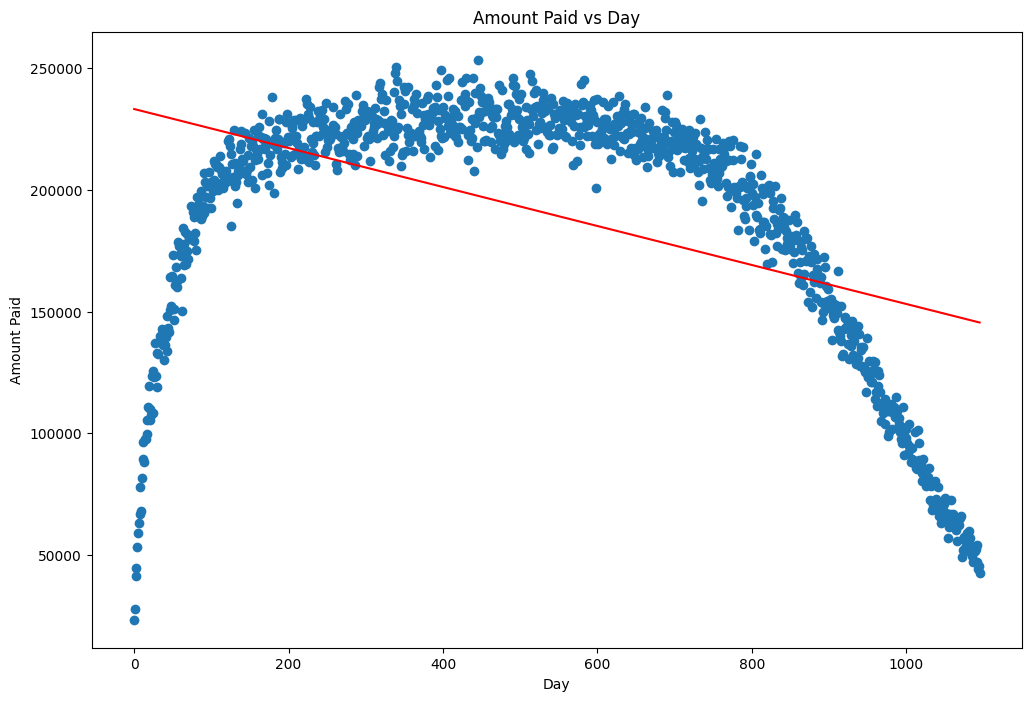

,CLM_FROM_DT,NBR_CLMS,BENES,NBR_PROCS,AMOUNT_PAID,day
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2009-07-01 12:00:00,2165.701642,2075.413321,4144.661496,189364.142336,547.500000
min,2008-01-01 00:00:00,254.000000,242.000000,491.000000,23450.000000,0.000000
25%,2008-09-30 18:00:00,1887.500000,1825.250000,3641.250000,165422.500000,273.750000
50%,2009-07-01 12:00:00,2480.000000,2373.500000,4726.500000,214700.000000,547.500000
75%,2010-04-01 06:00:00,2579.500000,2466.000000,4921.000000,225665.000000,821.250000
max,2010-12-31 00:00:00,2738.000000,2623.000000,5320.000000,253460.000000,1095.000000
std,NaN,599.443551,570.351083,1139.167325,52955.892909,316.532252


In [8]:
# convert CLM_FROM_DT to datetime
df['CLM_FROM_DT'] = pd.to_datetime(df['CLM_FROM_DT'])


# correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

#              CLM_FROM_DT  NBR_CLMS     BENES  NBR_PROCS  AMOUNT_PAID
# CLM_FROM_DT     1.000000 -0.531830 -0.523230  -0.505610    -0.478635
# NBR_CLMS       -0.531830  1.000000  0.999814   0.997190     0.990468
# BENES          -0.523230  0.999814  1.000000   0.997285     0.990866
# NBR_PROCS      -0.505610  0.997190  0.997285   1.000000     0.992759
# AMOUNT_PAID    -0.478635  0.990468  0.990866   0.992759     1.000000


# define the index - time sequence.
df['day'] = df.index

# fit linear regression model
model = LinearRegression()
model.fit(df[['day']],df['AMOUNT_PAID'])

# show the slope and intercept
print('slope:',model.coef_)
print('intercept:',model.intercept_)
print('R^2:',model.score(df[['day']],df['AMOUNT_PAID']))

# slope: [-80.07567721]
# intercept: 233205.57560766255
# R^2: 0.22909129418706609

# y prediction
y_pred = pd.Series(model.predict(df[['day']]))
y_pred
# graph the predictions
plt.figure(figsize=(12,8))
plt.scatter(df['day'],df['AMOUNT_PAID'])
plt.plot(df['day'],y_pred,color='red')
plt.xlabel('Day')
plt.ylabel('Amount Paid')
plt.title('Amount Paid vs Day')
plt.show()
# show row 500
df.iloc[500]
df.describe()

#### <span style="color:blue">Muliple regression</span>

coefficients [48.64975211 27.11206409]
intercept: -28681.814790318545


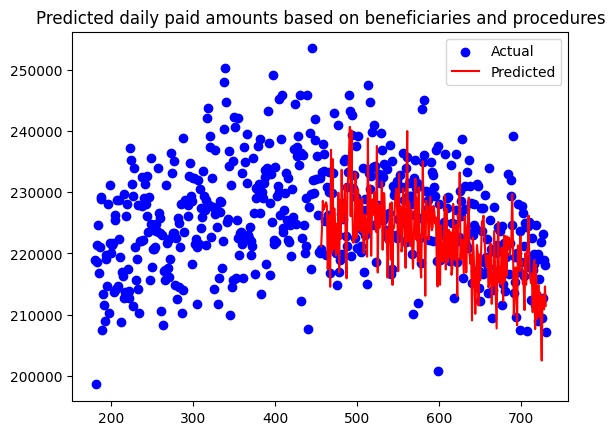

In [9]:
# Split the data into training and testing sets using the "good" data.
train = df[180:456]
test = df[456:731]
subset = df[180:731]

# Create the linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['BENES','NBR_PROCS']], train['AMOUNT_PAID'])

# Use the model to make predictions on the testing data
predictions = model.predict(test[['BENES', 'NBR_PROCS']])

print('coefficients', model.coef_)
print('intercept:', model.intercept_)

# coefficients [48.64975211 27.11206409]
# intercept: -28681.814790318545

# Plot the actual and predicted values
plt.scatter(subset['day'], subset['AMOUNT_PAID'], label='Actual', color='blue')
plt.plot(test['day'], predictions, label='Predicted', color='red')
plt.title('Predicted daily paid amounts based on beneficiaries and procedures')
plt.legend()
plt.show()